In [1]:
# Load necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import scipy.stats as stats  
import statsmodels.api as sm 
import pingouin as pg 

In [2]:
# Load the dataset and preview first few rows

offense = pd.read_csv(r"C:\Users\USER\Desktop\APD_APD\apd_calls.csv",
                    parse_dates = ["response_datetime", "first_unit_arrived_datetime", "call_closed_datetime"],
                    dayfirst = True)
offense.head()

,incident_number,incident_type,mental_health_flag,priority_level,response_datetime,response_day_of_week,response_hour,first_unit_arrived_datetime,call_closed_datetime,sector,...,officer_injured/killed_count,subject_injured/killed_count,cther_injured/killed_count,geo_ID,census_block_group,council_district,first_unit-arrived_DOW3,first_unit_arrived_Hour,call_closed_DOW22,call_closed_Hour
0,242741642,Dispatched Incident,Not Mental Health Incident,Priority 0,2024-09-30 23:55:00,Mon,23,2024-09-30 23:58:00,2024-10-01 01:22:00,Edward,...,0.0,0.0,0.0,4.850000e+11,4.530409e+09,4.0,Mon,23,Tue,1
1,242741639,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-10-01 00:13:00,2024-10-01 00:18:00,David,...,0.0,0.0,0.0,4.850000e+11,4.530013e+09,3.0,Tue,0,Tue,0
2,242741640,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-09-30 23:58:00,2024-10-01 00:50:00,Ida,...,0.0,0.0,0.0,4.850000e+11,4.530434e+09,4.0,Mon,23,Tue,0
3,242741638,Dispatched Incident,Mental Health Incident,Priority 3,2024-09-30 23:54:00,Mon,23,2024-10-01 01:23:00,2024-10-01 01:23:00,Edward,...,0.0,0.0,0.0,4.850000e+11,4.530442e+09,7.0,Tue,1,Tue,1
4,242741637,Dispatched Incident,Not Mental Health Incident,Priority 2,2024-09-30 23:54:00,Mon,23,2024-09-30 23:58:00,2024-10-01 00:43:00,Frank,...,0.0,0.0,0.0,4.850000e+11,4.530024e+09,2.0,Mon,23,Tue,0


In [3]:
# conversion to datetime

offense["response_datetime"] = pd.to_datetime(offense["response_datetime"])
offense["first_unit_arrived_datetime"] = pd.to_datetime(offense["first_unit_arrived_datetime"])
offense["call_closed_datetime"] = pd.to_datetime(offense["call_closed_datetime"])


In [4]:
# checking number of columns and rows
offense.shape

(952828, 29)

In [5]:
# checking for total number of duplicates
offense.duplicated().sum()

np.int64(0)

In [6]:
# Viewing column Data types

offense.dtypes

incident_number                          int64
incident_type                           object
mental_health_flag                      object
priority_level                          object
response_datetime               datetime64[ns]
response_day_of_week                    object
response_hour                            int64
first_unit_arrived_datetime     datetime64[ns]
call_closed_datetime            datetime64[ns]
sector                                  object
initial_problem_description             object
intial_problem_category                 object
final_problem_description               object
final_problem_category                  object
number_of_units_arrived                  int64
unit_time_on_scene                     float64
call_disposition_description            object
report_writing_flag                     object
response_time                          float64
officer_injured/killed_count           float64
subject_injured/killed_count           float64
cther_injured

In [ ]:
# Viewing column information

offense.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952828 entries, 0 to 952827
Data columns (total 29 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0   incident_number               952828 non-null  int64         
 1   incident_type                 952828 non-null  object        
 2   mental_health_flag            952828 non-null  object        
 3   priority_level                952828 non-null  object        
 4   response_datetime             952828 non-null  datetime64[ns]
 5   response_day_of_week          952828 non-null  object        
 6   response_hour                 952828 non-null  int64         
 7   first_unit_arrived_datetime   952828 non-null  datetime64[ns]
 8   call_closed_datetime          952828 non-null  datetime64[ns]
 9   sector                        952828 non-null  object        
 10  initial_problem_description   952828 non-null  object        
 11  intial_proble

In [8]:
# viewing the number of columns present

offense.columns

Index(['incident_number', 'incident_type', 'mental_health_flag',
       'priority_level', 'response_datetime', 'response_day_of_week',
       'response_hour', 'first_unit_arrived_datetime', 'call_closed_datetime',
       'sector', 'initial_problem_description', 'intial_problem_category',
       'final_problem_description', 'final_problem_category',
       'number_of_units_arrived', 'unit_time_on_scene',
       'call_disposition_description', 'report_writing_flag', 'response_time',
       'officer_injured/killed_count', 'subject_injured/killed_count',
       'cther_injured/killed_count', 'geo_ID', 'census_block_group',
       'council_district', 'first_unit-arrived_DOW3',
       'first_unit_arrived_Hour', 'call_closed_DOW22', 'call_closed_Hour'],
      dtype='object')

In [9]:
# Viewing any missing values by column
offense.isna().any()

incident_number                 False
incident_type                   False
mental_health_flag              False
priority_level                  False
response_datetime               False
response_day_of_week            False
response_hour                   False
first_unit_arrived_datetime     False
call_closed_datetime            False
sector                          False
initial_problem_description     False
intial_problem_category         False
final_problem_description       False
final_problem_category          False
number_of_units_arrived         False
unit_time_on_scene               True
call_disposition_description    False
report_writing_flag              True
response_time                    True
officer_injured/killed_count     True
subject_injured/killed_count     True
cther_injured/killed_count       True
geo_ID                           True
census_block_group               True
council_district                 True
first_unit-arrived_DOW3         False
first_unit_a

In [10]:
# Total number of missing values per column
missingValues = offense.isna().sum()
print(missingValues)

incident_number                  0
incident_type                    0
mental_health_flag               0
priority_level                   0
response_datetime                0
response_day_of_week             0
response_hour                    0
first_unit_arrived_datetime      0
call_closed_datetime             0
sector                           0
initial_problem_description      0
intial_problem_category          0
final_problem_description        0
final_problem_category           0
number_of_units_arrived          0
unit_time_on_scene              20
call_disposition_description     0
report_writing_flag              1
response_time                    1
officer_injured/killed_count     1
subject_injured/killed_count     1
cther_injured/killed_count       1
geo_ID                           4
census_block_group               4
council_district                 1
first_unit-arrived_DOW3          0
first_unit_arrived_Hour          0
call_closed_DOW22                0
call_closed_Hour    

<Axes: >

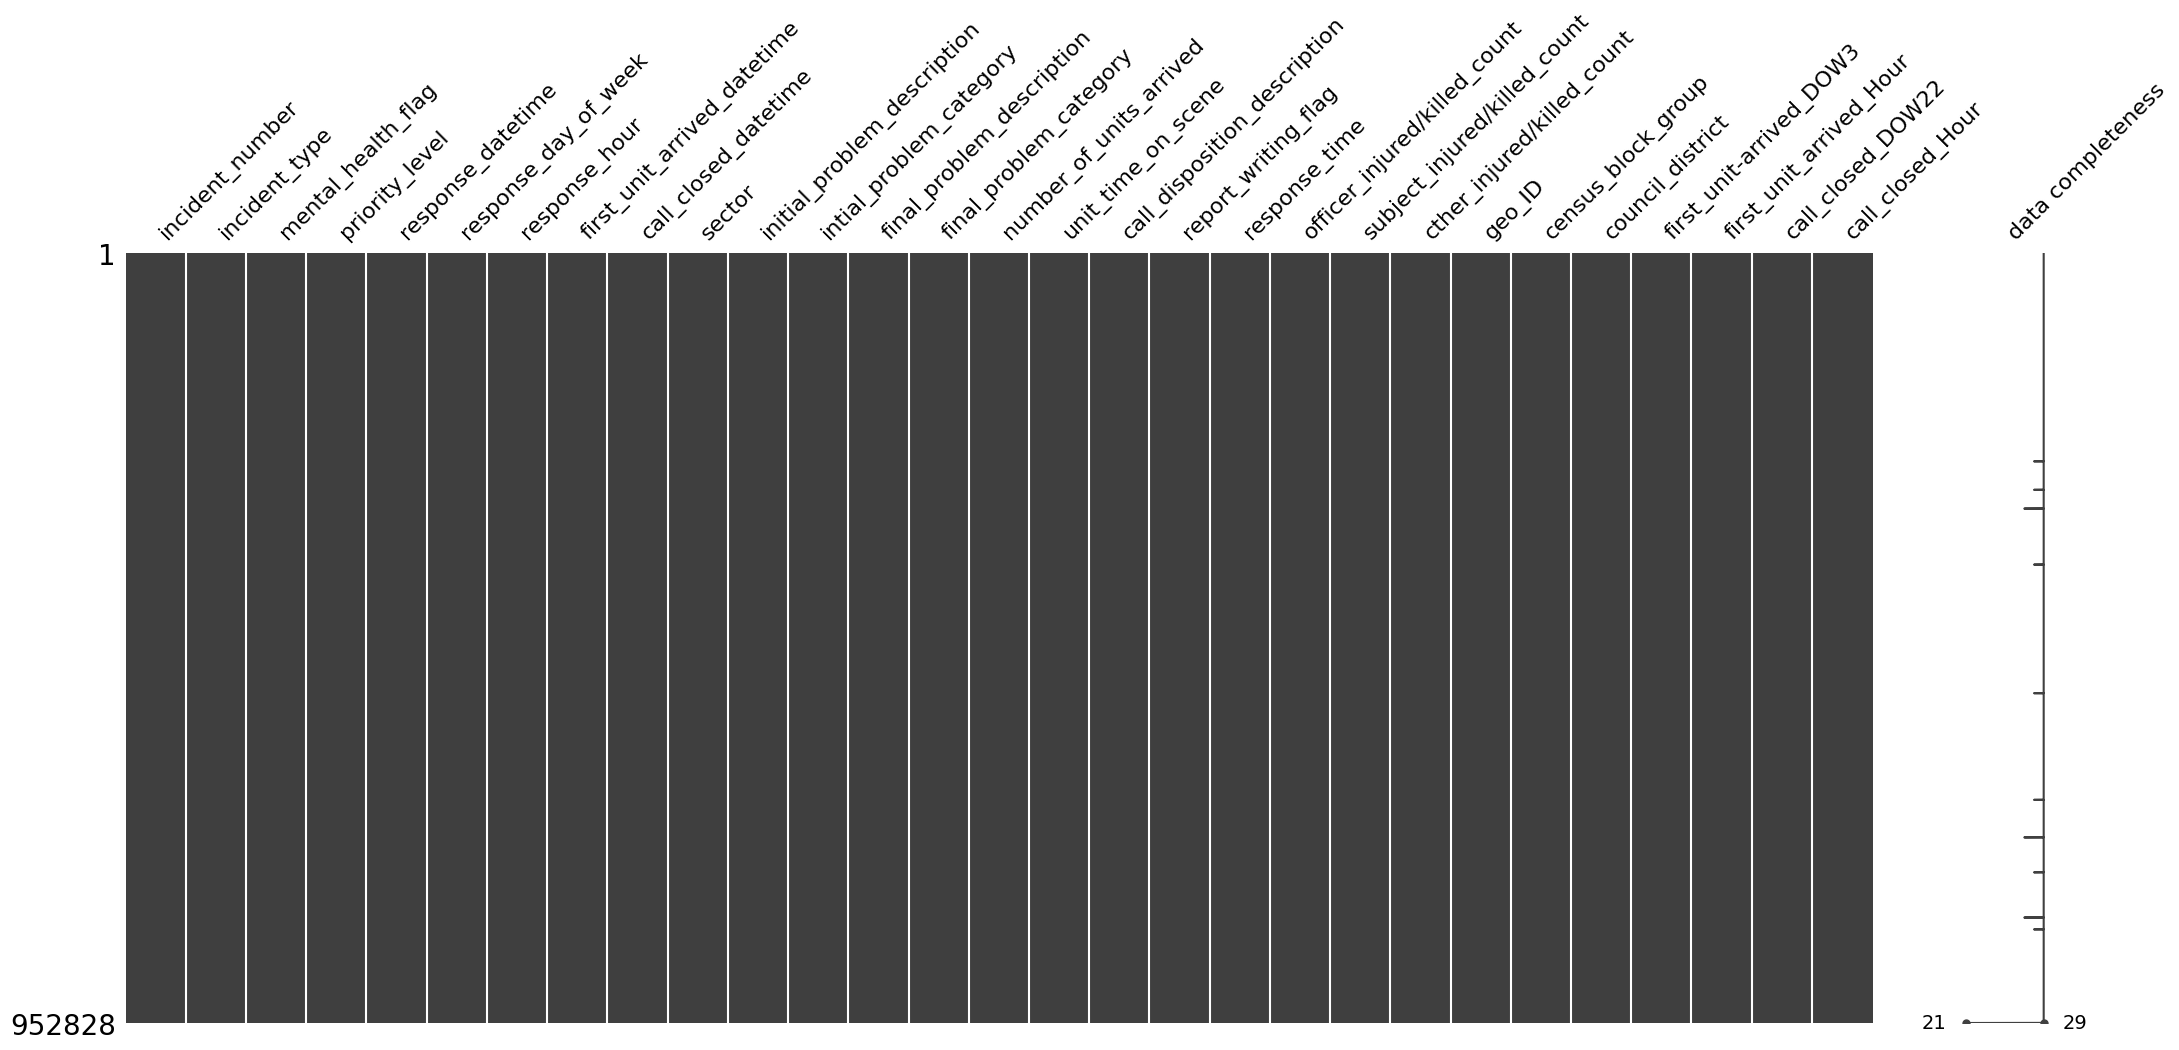

In [11]:
# Using Little's MCAR to visualize the randomness of missing values
msno.matrix(offense, labels = True)

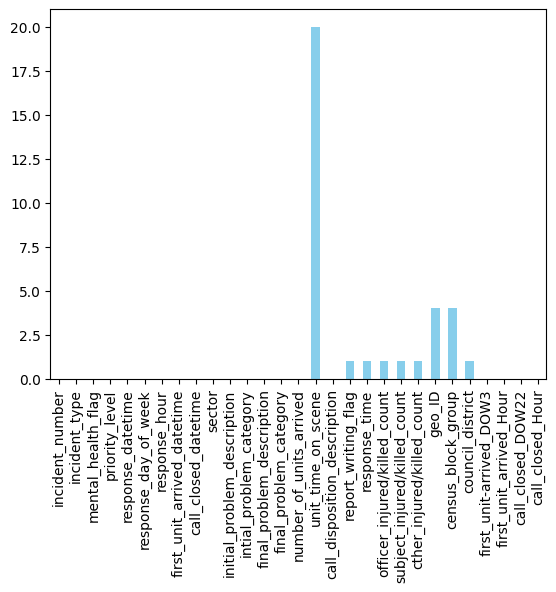

In [12]:
missingValues = offense.isna().sum()
missingValues.plot(kind = "bar", color = "skyblue")
plt.show()

In [13]:
# Correct the column name typo and ensure numeric columns are handled properly
meanColumnsWithMissingValues = offense[["unit_time_on_scene", "report_writing_flag", "response_time", 
                                        "officer_injured/killed_count", "subject_injured/killed_count", 
                                        "cther_injured/killed_count", "census_block_group"]].mean(numeric_only=True)

# Fill missing values in each column with the respective column mean
offense.fillna(meanColumnsWithMissingValues, inplace=True)


In [14]:
offense.isna().sum()

incident_number                 0
incident_type                   0
mental_health_flag              0
priority_level                  0
response_datetime               0
response_day_of_week            0
response_hour                   0
first_unit_arrived_datetime     0
call_closed_datetime            0
sector                          0
initial_problem_description     0
intial_problem_category         0
final_problem_description       0
final_problem_category          0
number_of_units_arrived         0
unit_time_on_scene              0
call_disposition_description    0
report_writing_flag             1
response_time                   0
officer_injured/killed_count    0
subject_injured/killed_count    0
cther_injured/killed_count      0
geo_ID                          4
census_block_group              0
council_district                1
first_unit-arrived_DOW3         0
first_unit_arrived_Hour         0
call_closed_DOW22               0
call_closed_Hour                0
dtype: int64

In [15]:
# Descriptive Analysis

offense.describe()

,incident_number,response_datetime,response_hour,first_unit_arrived_datetime,call_closed_datetime,number_of_units_arrived,unit_time_on_scene,response_time,officer_injured/killed_count,subject_injured/killed_count,cther_injured/killed_count,geo_ID,census_block_group,council_district,first_unit_arrived_Hour,call_closed_Hour
count,9.528280e+05,952828,952828.000000,952828,952828,952828.000000,9.528280e+05,952828.000000,952828.000000,952828.000000,952828.0,9.528240e+05,9.528280e+05,952827.000000,952828.000000,952828.000000
mean,2.277474e+08,2023-02-05 19:57:54.039155712,12.827068,2023-02-05 20:34:34.768562688,2023-02-05 21:34:13.345893120,1.927802,6.090606e+03,2254.094700,0.000001,0.000003,0.0,4.849997e+11,4.544831e+09,4.887035,12.958112,12.786413
min,2.117307e+08,2021-06-22 13:00:00,0.000000,2021-06-22 13:09:00,2021-06-22 13:24:00,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,4.820000e+11,2.090109e+09,0.000000,0.000000,0.000000
25%,2.210600e+08,2022-04-16 00:06:00,8.000000,2022-04-16 00:26:45,2022-04-16 01:21:45,1.000000,1.005000e+03,448.000000,0.000000,0.000000,0.0,4.850000e+11,4.530015e+09,3.000000,8.000000,7.000000
50%,2.303507e+08,2023-02-04 11:32:30,14.000000,2023-02-04 12:04:00,2023-02-04 13:07:30,2.000000,2.931000e+03,832.000000,0.000000,0.000000,0.0,4.850000e+11,4.530024e+09,4.000000,14.000000,14.000000
75%,2.333601e+08,2023-12-02 01:03:00,18.000000,2023-12-02 01:46:00,2023-12-02 02:53:00,2.000000,6.767000e+03,2050.000000,0.000000,0.000000,0.0,4.850000e+11,4.530403e+09,7.000000,19.000000,19.000000
max,2.427416e+08,2024-09-30 23:55:00,23.000000,2024-10-01 09:20:00,2024-10-01 09:41:00,101.000000,2.460453e+06,182878.000000,1.000000,1.000000,0.0,4.850000e+11,4.910206e+09,10.000000,23.000000,23.000000
std,9.825135e+06,NaN,6.675486,NaN,NaN,1.439672,1.357811e+04,4421.823241,0.001024,0.001774,0.0,2.947733e+07,7.719665e+07,2.871275,6.745912,6.944514


# Tasks Proper

In [16]:
# 1.	What is the total number of incidents that occurred in each sector?

# Total Number of crimes by sector
sector_incidents = offense["sector"].value_counts()
print(sector_incidents)


# Count the total number of incidents for each sector
incidents_per_sector = offense['sector'].value_counts()
print(incidents_per_sector)

sector
Edward     137979
David      125807
Frank      113262
Adam       110003
Charlie    105073
Baker      101158
Ida         95481
Henry       94855
George      52699
Airport     16510
Other           1
Name: count, dtype: int64
sector
Edward     137979
David      125807
Frank      113262
Adam       110003
Charlie    105073
Baker      101158
Ida         95481
Henry       94855
George      52699
Airport     16510
Other           1
Name: count, dtype: int64


In [17]:
# 2.	What are the top 5 busiest geographic areas in terms of 911 calls, and what is the average response time for each of these areas?
# Number of Geo ID
top_geog = offense["geo_ID"].value_counts()
print(top_geog)

# Average reponse time
avgResponseTimeByGeoID = offense[offense["geo_ID"].isin(top_geog.index)].groupby("geo_ID")["response_time"].mean()
print("\n", avgResponseTimeByGeoID)

geo_ID
4.850000e+11    952732
4.820000e+11        92
Name: count, dtype: int64

 geo_ID
4.820000e+11    2576.739130
4.850000e+11    2254.069102
Name: response_time, dtype: float64


In [18]:
# 3.	Identify sectors where mental health-related incidents make up more than 30% of the total incidents.
offense.groupby("sector")["mental_health_flag"].value_counts()


sector   mental_health_flag        
Adam     Not Mental Health Incident     96028
         Mental Health Incident         13975
Airport  Not Mental Health Incident     16158
         Mental Health Incident           352
Baker    Not Mental Health Incident     85405
         Mental Health Incident         15753
Charlie  Not Mental Health Incident     92279
         Mental Health Incident         12794
David    Not Mental Health Incident    106739
         Mental Health Incident         19068
Edward   Not Mental Health Incident    122805
         Mental Health Incident         15174
Frank    Not Mental Health Incident     98208
         Mental Health Incident         15054
George   Not Mental Health Incident     44675
         Mental Health Incident          8024
Henry    Not Mental Health Incident     84140
         Mental Health Incident         10715
Ida      Not Mental Health Incident     83473
         Mental Health Incident         12008
Other    Not Mental Health Incident         

In [ ]:
# 3.	Identify sectors where mental health-related incidents make up more than 30% of the total incidents.
totalIncidentPerSector = offense.groupby("sector").size()
mentalHealthIncident = offense[offense["mental_health_flag"] == "Mental Health Incident"].groupby("sector").size()
mentalHealthPercentage = (mentalHealthIncident / totalIncidentPerSector) * 100

sectorsAbove_30 = mentalHealthPercentage[mentalHealthPercentage > 30]

print(sectorsAbove_30)

sector
Adam       12.704199
Airport     2.132041
Baker      15.572668
Charlie    12.176296
David      15.156549
Edward     10.997326
Frank      13.291307
George     15.226095
Henry      11.296189
Ida        12.576324
Other            NaN
dtype: float64
Series([], dtype: float64)


# Evalyn

sector
David      False
Baker      False
Edward     False
Frank      False
Adam       False
Charlie    False
Ida        False
Henry      False
George     False
Airport    False
Name: count, dtype: bool


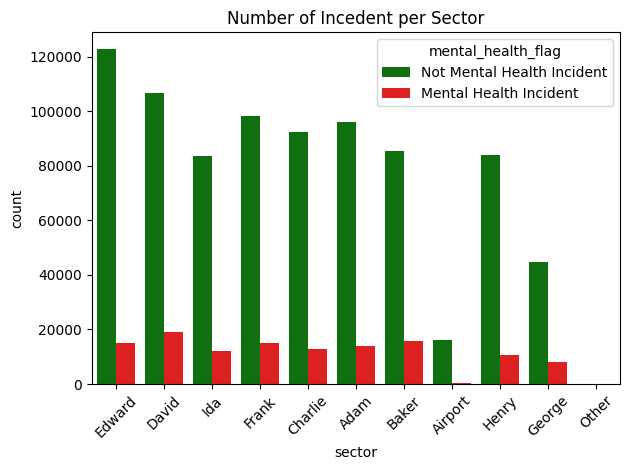

In [20]:
# Q3 Identify sectors where mental health-related incidents make up more than 30% of the total incidents.
#  Filter the metal illness group
mental_illness = offense[offense["mental_health_flag"] == "Mental Health Incident"]

# Count the number of incidents per sector
total_incidents_per_sector = mental_illness['sector'].value_counts()

#obtain percentage of sector over the total
percectage_incident_per_sector = total_incidents_per_sector/952828 * 100

# Sector Where Mental illness > 30% of total incidents

Mental_illness_sector_30per_above = percectage_incident_per_sector > 30

print(Mental_illness_sector_30per_above)

# Visualization
hue_colors = {"Mental Health Incident":"red","Not Mental Health Incident": "Green"}
fig, ax = plt.subplots()
sns.countplot(data = offense, x = 'sector',hue = 'mental_health_flag',
              palette = hue_colors )


# Customize the plot
ax.set_title('Number of Incedent per Sector')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

                  

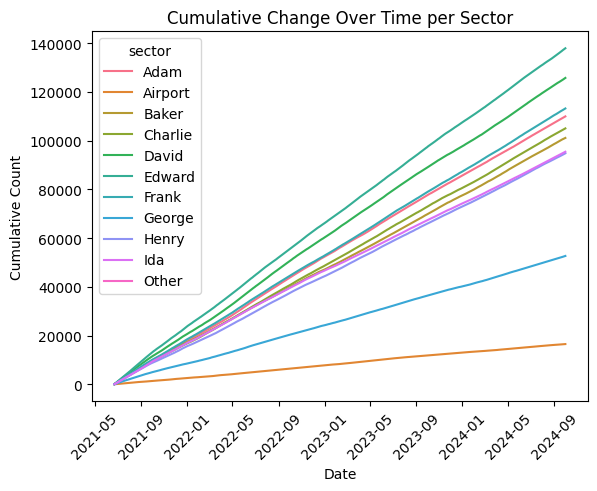

In [21]:
# 9. What is the cumulative number of calls throughout each day, and how does this cumulative total change by sector?

offense['date'] = offense['response_datetime'].dt.date
cummulative_calls_per_day = offense['date'].value_counts()

cumulative_change_per_sector = (
    offense.groupby('sector')['date']
    .value_counts()
    .sort_index()  # Sort by date for accurate cumulative counts
    .groupby(level=0)  # Group by sector
    .cumsum()  # Calculate cumulative sum within each sector
    .reset_index(name='Cumulative_Count'))

#visualization
sns.lineplot(
    data=cumulative_change_per_sector, 
    x='date', 
    y='Cumulative_Count', 
    hue='sector'
)
plt.title('Cumulative Change Over Time per Sector')
plt.xlabel('Date')
plt.ylabel('Cumulative Count')
plt.xticks(rotation=45)  # Rotate dates for better readability
plt.show()


geo_ID
4.850000e+11    1
Name: count, dtype: int64


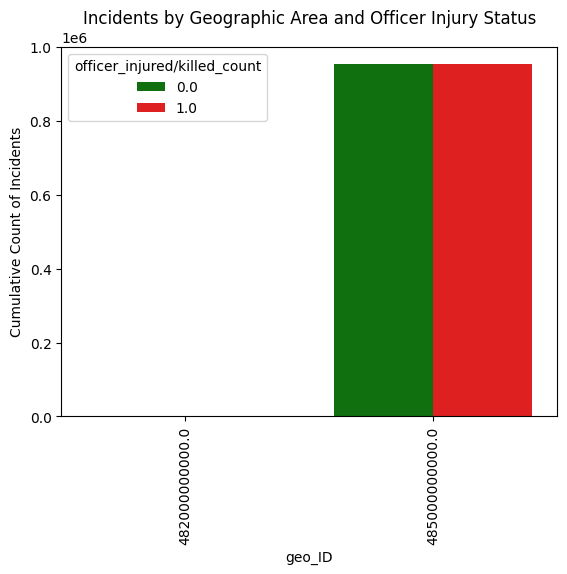

In [22]:
# 14.  Which geographic areas have the highest number of incidents involving officer injuries or fatalities?

Officers_injuries = offense[offense['officer_injured/killed_count'] >= 1]
geographic_areas = Officers_injuries['geo_ID'].value_counts()

print(geographic_areas)
#visualization
Geographic_area_with_highest_incidents = (
    offense.groupby(['geo_ID', 'officer_injured/killed_count'])
    .size()  # Count occurrences
    .groupby(level=0)  # Group by Geo ID to calculate cumulative sum within each area
    .cumsum()  # Cumulative sum within each Geo ID and injury status
    .reset_index(name='Count')  # Convert to DataFrame and name the count column
)
top_areas = (
    Geographic_area_with_highest_incidents.groupby('geo_ID')['Count']
    .max()  # Take the maximum cumulative count for each area
    .nlargest(30)  # Adjust N as needed
    .index
)

# Filter data to include only top N areas
filtered_data = Geographic_area_with_highest_incidents[Geographic_area_with_highest_incidents['geo_ID'].isin(top_areas)]
sns.barplot(
    data=filtered_data,
    x='geo_ID',
    y='Count',
    hue='officer_injured/killed_count',
    palette={1: 'red', 0: 'green'}
)


# Customize plot appearance
plt.title("Incidents by Geographic Area and Officer Injury Status")
plt.xlabel("geo_ID")
plt.ylabel("Cumulative Count of Incidents")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.show()



# Toheeb

In [23]:
# 4. What are the busiest days of the week, and how do the types of incidents differ across those days?
"""
uniqueDOW = crime["Response Day of Week"].unique()
busiest_DOW = crime.groupby(["Response Day of Week", "Incident Type"]).size().unstack()
sortBusiest_DOW = busiest_DOW.sort_values(ascending = False) 
"""
busiest_days = offense['response_day_of_week'].value_counts()
incidents_by_day = offense.groupby(['response_day_of_week', 'incident_type']).size().unstack()
print(busiest_days)
print(incidents_by_day)

response_day_of_week
Fri    144065
Sat    140209
Mon    135379
Sun    134736
Thu    134146
Wed    133303
Tue    130990
Name: count, dtype: int64
incident_type         Dispatched Incident
response_day_of_week                     
Fri                                144065
Mon                                135379
Sat                                140209
Sun                                134736
Thu                                134146
Tue                                130990
Wed                                133303


In [24]:
offense["response_day_of_week"].value_counts().idxmax()

'Fri'

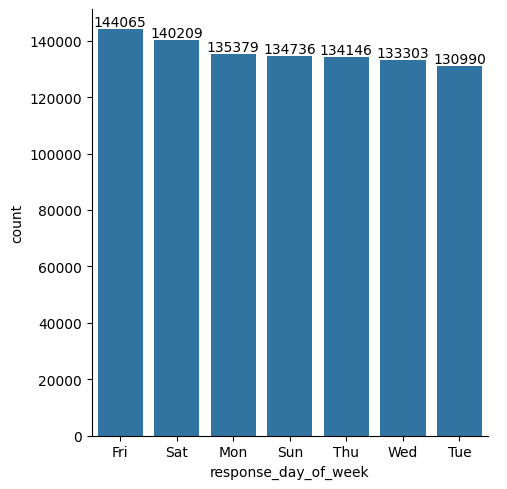

In [25]:
busiest_days = offense['response_day_of_week'].value_counts().reset_index()
busiest_days.columns = ["response_day_of_week", "count"]
ax = sns.catplot(data = busiest_days, x = "response_day_of_week", y = "count", kind = "bar")
ax = sns.barplot(data = busiest_days, x = "response_day_of_week", y = "count")
ax.bar_label(ax.containers[0])
plt.show()

In [26]:
# 6.	Which types of incidents have response times that are above the overall average response time?

overallMeanResponse = offense["response_hour"].mean()
incidentGreaterThanMean = offense[offense["response_hour"] > overallMeanResponse]["incident_type"].value_counts()
print(incidentGreaterThanMean)


incident_type
Dispatched Incident    524089
Name: count, dtype: int64


In [27]:
# 13.	How do response times compare across different priorities for each type of incident?
prioritiesIncident = offense.groupby(["priority_level", "incident_type"])["response_hour"].mean().unstack()
print(prioritiesIncident)


incident_type   Dispatched Incident
priority_level                     
Priority 0                12.874150
Priority 1                13.019212
Priority 2                12.684042
Priority 3                12.991660


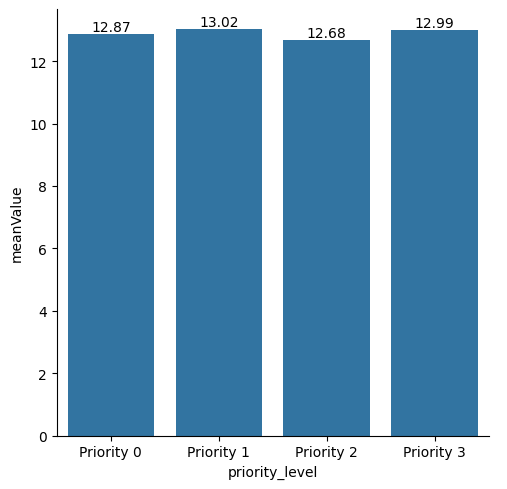

In [28]:
prioritiesIncident = offense.groupby(["priority_level", "incident_type"])["response_hour"].mean().unstack().round(2).reset_index()
prioritiesIncident.columns = ["priority_level", "meanValue"]
ax = sns.catplot(data = prioritiesIncident, x = "priority_level", y = "meanValue", kind = "bar")
ax = sns.barplot(data = prioritiesIncident, x = "priority_level", y = "meanValue")
ax.bar_label(ax.containers[0])
plt.show()

In [29]:
# 16.	How many incidents involve serious injury or death (either officers or subjects) related to mental health?

incidentInjuryDeath = offense[(offense["mental_health_flag"] == "Mental Health Incident") & ((offense["subject_injured/killed_count"] > 0) | (offense["subject_injured/killed_count"] > 0))]
injuries = incidentInjuryDeath.shape[0]
print(f"The number of injuries that are caused by Mental Health Incidents for Officer or Subject is: {injuries}")

The number of injuries that are caused by Mental Health Incidents for Officer or Subject is: 4


# Augustine

In [30]:
# 1.	What is the total number of incidents that occurred in each sector?

# Count the total number of incidents for each sector
incidents_per_sector = offense['sector'].value_counts()
print(incidents_per_sector)

sector
Edward     137979
David      125807
Frank      113262
Adam       110003
Charlie    105073
Baker      101158
Ida         95481
Henry       94855
George      52699
Airport     16510
Other           1
Name: count, dtype: int64


In [31]:
# 11.	What are the most common types of incidents that occur between 10 PM and 6 AM?

# Filter incidents between 10 PM and 6 AM
nighttime_incidents = offense[(offense['response_hour'] >= 22) | (offense['response_hour'] <= 6)]

# Count occurrences of each incident type during these hours
common_night_incidents = nighttime_incidents['incident_type'].value_counts()
print(common_night_incidents)

# Did a little adjustment on the code as it is asking between 10pm and 6am. So both should be included

incident_type
Dispatched Incident    277350
Name: count, dtype: int64


In [32]:
# 21.	What are the busiest times of the day, and how do incident types vary by time?
# Did a little adjustment here as well because the busiest hour was not selected 

oneCode = offense.groupby("incident_type")["response_hour"].value_counts()
oneCode = oneCode.reset_index(name = "count")
row1 = oneCode.iloc[0]
hour = row1["response_hour"]
count = row1["count"]

print(f"The busiest hour is {hour}, and the value is {count}")

The busiest hour is 17, and the value is 51921


In [33]:
# 25.	What is the distribution of response times across the sectors, and which sectors have the fastest and slowest response times?

# Convert datetime columns to pandas datetime format if not already done
# df['response_datetime'] = pd.to_datetime(df['response_datetime'], format='%d/%m/%Y %H:%M')
# df['first_unit_arrived_datetime'] = pd.to_datetime(df['first_unit_arrived_datetime'], format='%d/%m/%Y %H:%M')

# Calculate response time in minutes
offense['response_time_minutes'] = (offense['first_unit_arrived_datetime'] - offense['response_datetime']).dt.total_seconds() / 60

# Get response time statistics by sector
response_time_distribution = offense.groupby("sector")['response_time_minutes'].describe()
print(response_time_distribution)

# Find sectors with the fastest and slowest average response times
fastest_sector = offense.groupby("sector")['response_time_minutes'].mean().idxmin()
slowest_sector = offense.groupby("sector")['response_time_minutes'].mean().idxmax()

print("Fastest Sector:", fastest_sector)
print("Slowest Sector:", slowest_sector)

            count       mean        std   min   25%   50%   75%     max
sector                                                                 
Adam     110003.0  38.959883  74.838227 -58.0   8.0  15.0  36.0  1596.0
Airport   16510.0   6.641672   9.572376   0.0   3.0   5.0   8.0   380.0
Baker    101158.0  28.709366  53.115202   0.0   7.0  12.0  27.0  1486.0
Charlie  105073.0  36.520933  67.833101   0.0   7.0  13.0  35.0  1509.0
David    125807.0  32.256353  59.423506   0.0   7.0  13.0  31.0  1471.0
Edward   137979.0  47.602295  98.070471   0.0   7.0  15.0  42.0  2672.0
Frank    113262.0  42.390166  84.726047   0.0   7.0  14.0  39.0  3046.0
George    52699.0  23.545893  43.378359   0.0   4.0   8.0  21.0   797.0
Henry     94855.0  41.919477  83.388270   0.0   6.0  13.0  39.0  2661.0
Ida       95481.0  33.170903  64.512870   0.0   6.0  12.0  31.0  2265.0
Other         1.0  11.000000        NaN  11.0  11.0  11.0  11.0    11.0
Fastest Sector: Airport
Slowest Sector: Edward


In [34]:
offense["officer_injured/killed_count"].unique()

array([0.00000000e+00, 1.00000000e+00, 1.04950846e-06])

In [35]:
offense["subject_injured/killed_count"].unique()

array([0.00000000e+00, 1.00000000e+00, 3.14852539e-06])

In [36]:
# 24.	What is the average time spent on scene by units across different types of incidents?

avgUnitSpentOnScene = offense["unit_time_on_scene"].mean().round(2)
print(f"Average time spent on Scene in second is: {avgUnitSpentOnScene} seconds")
timeSpentinHours = round((avgUnitSpentOnScene / 3600), 2)
print(f"Average Time Spent on Scene in Hours is: {timeSpentinHours} hrs")

Average time spent on Scene in second is: 6090.61 seconds
Average Time Spent on Scene in Hours is: 1.69 hrs


In [37]:
# 28.	How many incidents were initiated by officers in the field compared to those dispatched via 911 calls?
initiatedByOfficer = offense[offense["initial_problem_description"].str.contains("Officer")].shape[0]
initiatedBy_911 = offense[offense["initial_problem_description"].str.contains('911')].shape[0]
print(initiatedBy_911)


87


In [38]:
# 20.	What are the top 3 most frequent final problem descriptions?

mostFrequentProblemDescription = offense["final_problem_description"].value_counts().sort_values(ascending = False)
mostProblemDecription = mostFrequentProblemDescription.iloc[0:3]
print(f"The top 3 most frquent final problem descriptions are {mostProblemDecription}")


The top 3 most frquent final problem descriptions are final_problem_description
Trespass Urgent      73749
Disturbance Other    55748
Suspicious Person    55344
Name: count, dtype: int64


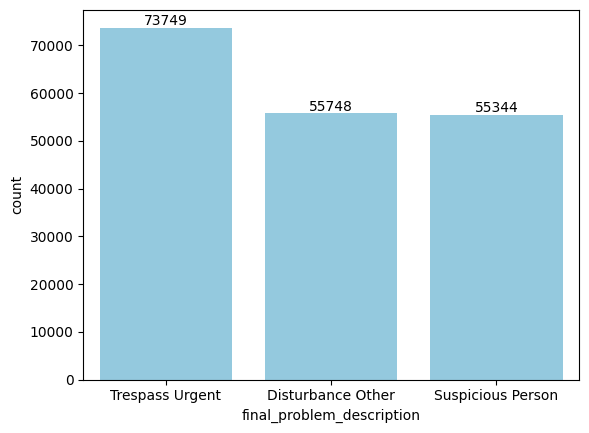

In [90]:
mostFrequentProblemDescription = offense["final_problem_description"].value_counts().sort_values(ascending = False)
mostProblemDescription = mostFrequentProblemDescription.iloc[0:3].reset_index()
mostProblemDescription.columns = ["final_problem_description", "count"]

ax = sns.barplot(data = mostProblemDescription, x = "final_problem_description", y = "count", color = "skyblue")
ax.bar_label(ax.containers[0])
plt.show()

In [39]:
offense["unit_time_on_scene"].max()

np.float64(2460453.0)

In [ ]:
# 26.	Which incidents have the longest on-scene time, and how does this correlate with the incident type or priority level?

maxTimeOnScene = offense[offense["unit_time_on_scene"] == offense["unit_time_on_scene"].max()]

print(maxTimeOnScene[["incident_type", "priority_level", "unit_time_on_scene"]])


              incident_type priority_level  unit_time_on_scene
253020  Dispatched Incident     Priority 0           2460453.0


# AbdulRasheed

In [41]:
# Calculate the count of incidents by day of the week
busiest_days = offense['response_day_of_week'].value_counts().sort_values(ascending=False)
print("Busiest Days of the Week:")
print(busiest_days)

Busiest Days of the Week:
response_day_of_week
Fri    144065
Sat    140209
Mon    135379
Sun    134736
Thu    134146
Wed    133303
Tue    130990
Name: count, dtype: int64


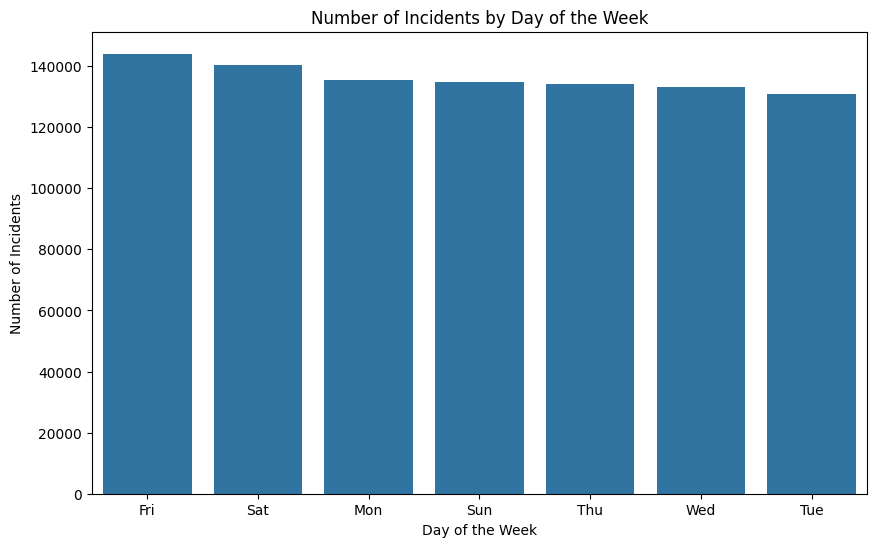

In [42]:
#Plot the busiest days
plt.figure(figsize=(10, 6))
sns.barplot(x=busiest_days.index, y=busiest_days.values)
plt.title('Number of Incidents by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Incidents')
plt.show()

In [43]:
# Group by day of the week and incident type to see how incidents differ across days
incident_types_by_day = offense.groupby(['response_day_of_week', 'incident_type']).size().unstack()
print("\nIncident Types by Day of the Week:")
print(incident_types_by_day)


Incident Types by Day of the Week:
incident_type         Dispatched Incident
response_day_of_week                     
Fri                                144065
Mon                                135379
Sat                                140209
Sun                                134736
Thu                                134146
Tue                                130990
Wed                                133303


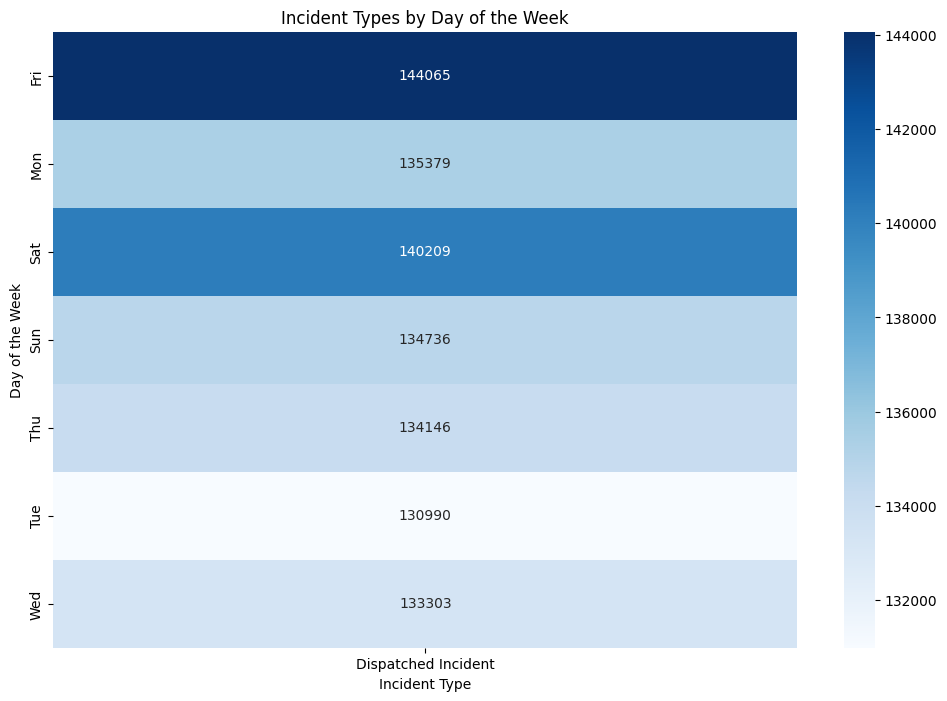

In [44]:
# Heatmap for incidents by type across days
plt.figure(figsize=(12, 8))
sns.heatmap(incident_types_by_day, cmap='Blues', annot=True, fmt='d')
plt.title('Incident Types by Day of the Week')
plt.xlabel('Incident Type')
plt.ylabel('Day of the Week')
plt.show()

In [45]:
# 7.	Find the geographic areas where the average number of units dispatched is greater than the average number of units dispatched across all areas.

overall_avg_units_dispatched = offense['number_of_units_arrived'].mean()

# Calculate the average number of units dispatched for each geographic area
avg_units_by_geo = offense.groupby('geo_ID')['number_of_units_arrived'].mean()

# Filter areas where the average number of units dispatched is greater than the overall average
areas_above_avg = avg_units_by_geo[avg_units_by_geo > overall_avg_units_dispatched]
print("Geographic areas where the average number of units dispatched is greater than the overall average:")
print(areas_above_avg)

Geographic areas where the average number of units dispatched is greater than the overall average:
geo_ID
4.850000e+11    1.927803
Name: number_of_units_arrived, dtype: float64


In [46]:
# 12.	What percentage of incidents required more than 3 units to be dispatched?

# Count the total number of incidents
total_incidents = offense.shape[0]

# Count incidents with more than 3 units dispatched
incidents_more_than_3_units = offense[offense['number_of_units_arrived'] > 3].shape[0]

# Calculate the percentage
percentage_more_than_3_units = (incidents_more_than_3_units / total_incidents) * 100

print(f"Percentage of incidents requiring more than 3 units: {percentage_more_than_3_units:.2f}%")

Percentage of incidents requiring more than 3 units: 7.62%


In [47]:
# 12.	What percentage of incidents required more than 3 units to be dispatched?

# Convert 'response_datetime' to datetime, with dayfirst=True
offense['response_datetime'] = pd.to_datetime(offense['response_datetime'], dayfirst=True)

# Filter for mental health-related incidents (assuming mental_health_flag=1 indicates a mental health-related incident)
mental_health_incidents = offense[offense['mental_health_flag'] == 1]

# Check if there are any incidents after filtering
total_mental_health_incidents = mental_health_incidents.shape[0]
print("Total number of mental health-related incidents:", total_mental_health_incidents)

if total_mental_health_incidents > 0:
    # Set the 'response_datetime' as the index for resampling
    mental_health_incidents = mental_health_incidents.set_index('response_datetime')
    
    # Group by year using 'YE' for year-end frequency
    mental_health_trend = mental_health_incidents.resample('YE').size()

    # Display the trend
    print("Yearly trend of mental health-related incidents:")
    print(mental_health_trend)
else:
    print("No mental health-related incidents found in the data.")


Total number of mental health-related incidents: 0
No mental health-related incidents found in the data.


# Columns

In [48]:
offense.columns

Index(['incident_number', 'incident_type', 'mental_health_flag',
       'priority_level', 'response_datetime', 'response_day_of_week',
       'response_hour', 'first_unit_arrived_datetime', 'call_closed_datetime',
       'sector', 'initial_problem_description', 'intial_problem_category',
       'final_problem_description', 'final_problem_category',
       'number_of_units_arrived', 'unit_time_on_scene',
       'call_disposition_description', 'report_writing_flag', 'response_time',
       'officer_injured/killed_count', 'subject_injured/killed_count',
       'cther_injured/killed_count', 'geo_ID', 'census_block_group',
       'council_district', 'first_unit-arrived_DOW3',
       'first_unit_arrived_Hour', 'call_closed_DOW22', 'call_closed_Hour',
       'date', 'response_time_minutes'],
      dtype='object')

In [49]:
offense["initial_problem_description"].unique()

array(['Prowler Hs', 'Suspicious Vehicle', 'Alarm Burglar',
       'Suspicious Person', 'Crash Urgent', 'Drugs',
       'Assist Non Emergency', 'Traffic Hazard', 'Deceased Person',
       'Disturbance Other', 'Trespass Urgent', 'Check Welfare Service',
       'Pedestrian On Hsr', 'Nature Unknown Urgent', 'Shots Fired',
       'Disturbance Service', 'Missing Hs', 'Check Welfare Urgent',
       'Sex Crime Service', 'Traffic Hazard Hs', 'Disturbance Urgent',
       'Crash Hs', 'Information', 'Union Pacific Crim Trespass',
       'Gun Urgent', 'Disturbance Hs', 'Auto Theft Service',
       'Sex Crime Urgent', 'Airport - Ua Faa Viol', 'Gun Hs',
       'Ccd / Counselor', 'Disturbance Vehicle Urgent',
       'Suspicious Unknown', 'Call From Tcso - Non Emergenc', 'Service',
       'Stalled Vehicle', 'Doc / C.o. Violation', 'Crash Service',
       'Alarm Glass Break', 'Missing Service', 'Theft', 'Animal Urgent',
       'Alarm Robbery', 'Burglary Vehicle', 'Kidnapping Abduction Hs',
       'Gun 

In [50]:
offense.columns

Index(['incident_number', 'incident_type', 'mental_health_flag',
       'priority_level', 'response_datetime', 'response_day_of_week',
       'response_hour', 'first_unit_arrived_datetime', 'call_closed_datetime',
       'sector', 'initial_problem_description', 'intial_problem_category',
       'final_problem_description', 'final_problem_category',
       'number_of_units_arrived', 'unit_time_on_scene',
       'call_disposition_description', 'report_writing_flag', 'response_time',
       'officer_injured/killed_count', 'subject_injured/killed_count',
       'cther_injured/killed_count', 'geo_ID', 'census_block_group',
       'council_district', 'first_unit-arrived_DOW3',
       'first_unit_arrived_Hour', 'call_closed_DOW22', 'call_closed_Hour',
       'date', 'response_time_minutes'],
      dtype='object')

In [51]:
offense.describe()

,incident_number,response_datetime,response_hour,first_unit_arrived_datetime,call_closed_datetime,number_of_units_arrived,unit_time_on_scene,response_time,officer_injured/killed_count,subject_injured/killed_count,cther_injured/killed_count,geo_ID,census_block_group,council_district,first_unit_arrived_Hour,call_closed_Hour,response_time_minutes
count,9.528280e+05,952828,952828.000000,952828,952828,952828.000000,9.528280e+05,952828.000000,952828.000000,952828.000000,952828.0,9.528240e+05,9.528280e+05,952827.000000,952828.000000,952828.000000,952828.000000
mean,2.277474e+08,2023-02-05 19:57:54.039155712,12.827068,2023-02-05 20:34:34.768562688,2023-02-05 21:34:13.345893120,1.927802,6.090606e+03,2254.094700,0.000001,0.000003,0.0,4.849997e+11,4.544831e+09,4.887035,12.958112,12.786413,36.678823
min,2.117307e+08,2021-06-22 13:00:00,0.000000,2021-06-22 13:09:00,2021-06-22 13:24:00,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.0,4.820000e+11,2.090109e+09,0.000000,0.000000,0.000000,-58.000000
25%,2.210600e+08,2022-04-16 00:06:00,8.000000,2022-04-16 00:26:45,2022-04-16 01:21:45,1.000000,1.005000e+03,448.000000,0.000000,0.000000,0.0,4.850000e+11,4.530015e+09,3.000000,8.000000,7.000000,6.000000
50%,2.303507e+08,2023-02-04 11:32:30,14.000000,2023-02-04 12:04:00,2023-02-04 13:07:30,2.000000,2.931000e+03,832.000000,0.000000,0.000000,0.0,4.850000e+11,4.530024e+09,4.000000,14.000000,14.000000,13.000000
75%,2.333601e+08,2023-12-02 01:03:00,18.000000,2023-12-02 01:46:00,2023-12-02 02:53:00,2.000000,6.767000e+03,2050.000000,0.000000,0.000000,0.0,4.850000e+11,4.530403e+09,7.000000,19.000000,19.000000,33.000000
max,2.427416e+08,2024-09-30 23:55:00,23.000000,2024-10-01 09:20:00,2024-10-01 09:41:00,101.000000,2.460453e+06,182878.000000,1.000000,1.000000,0.0,4.850000e+11,4.910206e+09,10.000000,23.000000,23.000000,3046.000000
std,9.825135e+06,NaN,6.675486,NaN,NaN,1.439672,1.357811e+04,4421.823241,0.001024,0.001774,0.0,2.947733e+07,7.719665e+07,2.871275,6.745912,6.944514,73.762900
